# Step-by-step explanation on solution development

## Workflow Stages
 
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

However there are use cases with exceptions.

* We may combine mulitple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Question(Problem) definition
Competition site define the prolem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. 

## Workflow goals
Seven major goals

* Classifying: Classify or Categorize our samples. understand the implications or correlation of different classes with our solution goal.

* Correlating: "Is there a correlation among a feature and solution goal?" This can be tested both for numerical and categorical features in the given dataset. Determine correlation among features. Correlating certain features may help in creating, completing, or correcting features.

* Converting: Convert data to one with another data type.

* Completing: Remove missing value.

* Correcting: Correct or exclude errors and possibly inaccurate values. Detect any outliers. Discard features that's not contributing to analysis or may significantly skwe the results.

* Creating: Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

* Charting: Select the right visualization plots and charts.

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import zipfile

def extract_dataset(dataset_name):
    with zipfile.ZipFile("input/"+dataset_name+".zip","r") as z:
        z.extractall("input/")

extract_dataset("titanic")

In [3]:
# Acquiring
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

## Analyzing by describing data
### Available features
    train.df.columns.values

### Which features are categorical
* categorical: Survived(0, 1), Sex(male, female), Embarked(S, C)
* ordinal: Pclass(1, 2, 3, 4)

### Which features are numerical
* continous: Age, Fare
* discrete: Sibsp(Siblings and Spouse), Parch(parents and children)

In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
test_df.info()
print('-'*40)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null 

### Mixed Date Types, Errors and Typo
* "Cabin" feature is alphanumeric, "Ticket" is a mix of numeric and alphanumeric data types.

### Which features contain blank, null or empty values?
* These will require Correcting.
* Cabin, Age, Embarked features contain a number of null values for the traning set
* Cabin, Age, Fares are incomplete in case of test dataset.

### What are the data types for various features?
Helping us during converting goal.
* Seven features are integer or floats. Six in case of test dataset.
* Five features are strings (object).


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Survived is a categorical feature with 0 or 1 values.
* Most passengers (> 75%) did not travel with parents or children.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mudd, Mr. Thomas Charles",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### What is the distribution of categorical features?

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Assumptions based on data analysis

### Correlating
* "How does each feature correlate with Survival?".  Match these early assumption with modelled correlations.

### Completing
* Complete Age, Embarked as it may correlate to survival.

### Correcting
* Drop Ticket, Cabin, PassengerId features as it is highly incomplete or does not contribute to survival.
* Consider dropping Name features as it may not contribute to Survival.

### Creating
* Create Family based on Parch, Sibsp features.
* Extract Title from Name feature/
* Turn Age feature into AgeBand feature. This turns a continous numerical feature into an ordinal categorical feature.
* Consider making FareRange feature if needed.

### Classifying
* Add your own assumption
> Women, Children and the upper-class passengers were more likely to have survived.

## Analyze by pivoting features
Analyze feature correlations to confirm your observations and assumption.
It also makes sense doing so only for features which are categorical.


* Pclass: Significant correlation (>0.5) among Pclass=1 and Survived
* Sex: Sex=female had very high survival rate at 74%
* SibSp and Parch: These had zero correlation for certain values. It may be to best to derive a feature or a set of features from these individual features.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

### Correlating numerical features
* Histogram Chart is useful for analyzing continous numerical variable where banding or ranges will help identify useful patterns.

Observations

* infants (Age <=4) had high survival rate.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

Decisions
* Use Age in your model training
* Complete Age feature
* Add BandAge feature



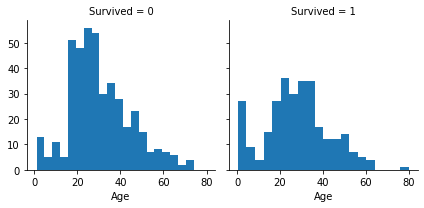

In [13]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20)

### Correlating numerical and ordinal features
__Observations__
* Pclass=3 had most passengers, but most did not survive. Confirms assumption #3
* Most passengers in Pclass=1 survived. Confirms assumption #3
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Confirms assumption 2.

__Decisions__
* Use Pclass for model training

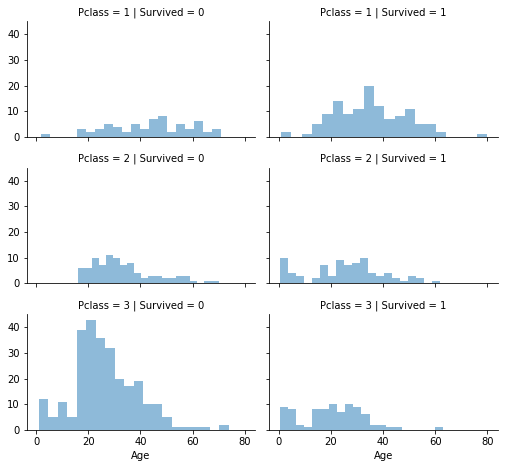

In [14]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
palette_array = np.divide(np.array([(228, 0, 43), (92, 6, 140)]), 255)

gidle_palette = sns.color_palette(palette=palette_array)

grid = sns.FacetGrid(train_df, row="Embarked", height=2.2, aspect=1.6)

grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=gidle_palette)
grid.add_legend()

### Correlating categorical features

__Observations__
* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

__Decisions__

* Add Sex feature to model training.
* Complete and add Embarked feature to model training.


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


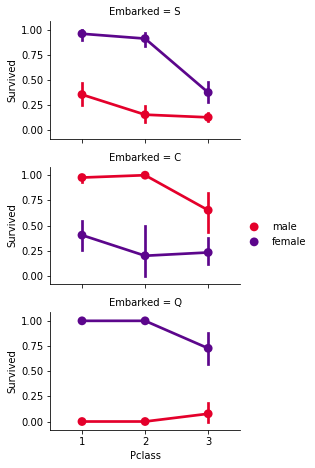

In [15]:
palette_array = np.divide(np.array([(228, 0, 43), (92, 6, 140)]), 255)

gidle_palette = sns.color_palette(palette=palette_array)

grid = sns.FacetGrid(train_df, row="Embarked", height=2.2, aspect=1.6)

grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=gidle_palette)
grid.add_legend()

### Correlating categorical and numerical features

correlate categorical features (with non-numeric values) and numeric features. Can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

__Observations.__

* Higher fare paying passengers had better survival. Confirms our assumption for creating fare ranges.
* Port of embarkation correlates with survival rates.  Confirms completing.

__Decisions.__

* Consider banding Fare feature.



/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


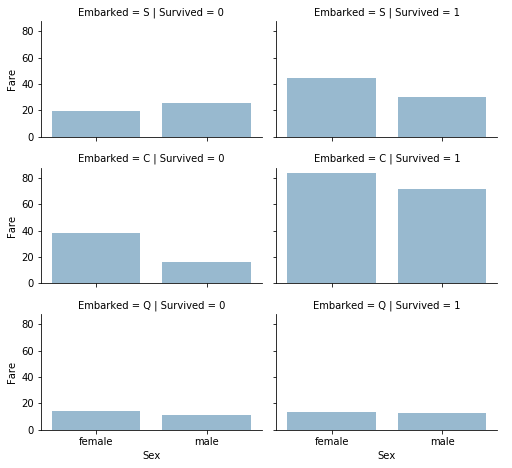

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [59]:
# If you modify train_df, combine[0] will give you the same result(modified object).

print("train_df: {}, test_df: {}, combine[0]: {}. combine[1]: {}". \
      format(*(id(obj) for obj in [train_df, test_df, combine[0], combine[1]])))

# train_df: 140054439457680, test_df: 140054315051216, combine[0]: 140054439457680. combine[1]: 140054315051216

train_df: 140054263678480, test_df: 140054263515408, combine[0]: 140054263678480. combine[1]: 140054263515408


## Wrangle data
With several assumptions and decisions regarding your dataset and solution requirement, Execute those for correcting, creating, and completing goals.

### Dropping features
* Dropping Cabin, Ticket features.(Highly incomplete or does not contribute to survival)


In [58]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 9) (418, 9) (891, 9) (418, 9)


KeyError: "['Ticket' 'Cabin'] not found in axis"

### Creating new features extracting from existing

* consider engineering Name feature to extract titles and test correlation between titles and survival, before dropping Name and PassengerId


In [60]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

AttributeError: 'DataFrame' object has no attribute 'Name'

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

print(combine[0].shape, combine[1].shape)
combine = [train_df, test_df]
print(train_df.shape, test_df.shape)

(891, 11) (418, 10)
(891, 9) (418, 9)


### Converting a categorical feature(Mapping)

* Convert features which contains strings to numerical values. It will be required by MOST model algorithms.

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

1. random number between mean and stddev
2. use other correlated features.(ex. use median values for Age across sets of Pclass and Gender. median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...)
3. combine methods 1, 2. Try guessing Age values using random numbers between mean and stddev, based on sets of Pclass and Gender combinations)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


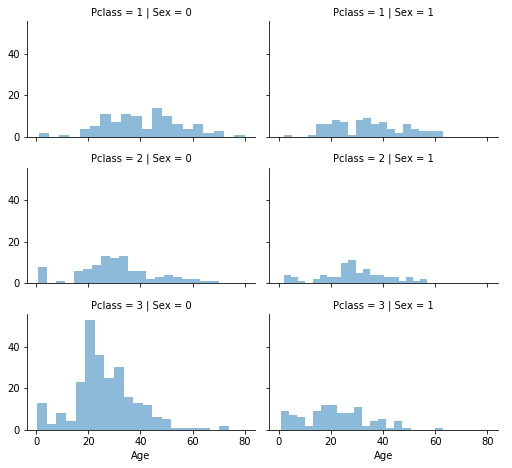

In [24]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
# method 2

guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int( age_guess/0.5 + 0.5) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                       'Age'] = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [29]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine =  [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature
Embark feature in the traning set only has two missing values. Simply fill these with the most common occurance.

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

In [39]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve
There are 60+ predictive modelling algorithms to choose from.
Our problem is a classification and regression problem. We are also perfoming Supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [42]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

    cumulative distribution function: 누적 분포 함수

Note the confidence score generated by the model based on our training dataset

In [43]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.26

In [44]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
print(coeff_df)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

           0
0     Pclass
1        Sex
2        Age
3       Fare
4   Embarked
5      Title
6    IsAlone
7  Age*Class


,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

* Sex: As the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
* So is Title as second highest positive correlation.

* Inversely as Pclass increases, probability of Survived=1 decreases the most.
* This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.


* __odds__: 실패에 비해 성공할 확률의 비

2015년 EXO 콘서트 예매 성공률 = 1/30, odds = 1/29 ≈ 0.034    
100명이 실패할동안 3.33명이 예매에 성공함.

* __logit(log-odds)__: odds에 log를 씌운 것

Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [45]:
# Support Vector Machine

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.5

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

KNN confidence score is better than Logistics Regression but worse than SVM.

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers __based on applying Bayes' theorem with strong (naive) independence assumptions between the features__. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [47]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

The perceptron is an algorithm for supervised learning of binary classifiers. It is a type of linear classifier.

In [48]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.23

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called __classification trees__; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called __regression trees.__

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

The next model Random Forests is one of the most popular. Random forests or random decision forests are an **ensemble learning method** for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

* mode: 최빈값

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

## Model evaluation

Decision Tree and Random Forest scored the same. Choose to use Random forest as they correst decision trees' **habit of overfitting to their training set.**

In [53]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,79.35
6,Stochastic Gradient Decent,78.23
4,Naive Bayes,76.88


In [54]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_pred
})
submission.to_csv('output/submission.csv', index=False)

# Study Summarization

이 notebook에서는 3, 4번 과정, 즉 Feature와 Answer(Survival)간 Correlations를 분석하여 사용할 Feature와 버릴 Feature를 선택하는 과정, 불완전한 Feature를 채워주는 과정에 대해 주로 다룬다.

### 다음과 같은 Workflow를 참고해라.

1. Question or problem definition.
2. Acquire training and testing data.
3. **Wrangle, prepare, cleanse the data.**
4. **Analyze, identify patterns, and explore the data.**
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

순서가 절대적인게 아니므로 유동적으로 바뀔 수 있다.

### Workflow의 Goals

1. Classifying
2. Correlating
3. Converting
4. Completing
5. Correcting
6. Creating
7. Charting

데이터의 feature는 몇개 인지, Categorical, Numerical Feature는 각각 몇개 인지, 오타 or Null 데이터는 없는가? Distribution은 어떠한가?
> .describe(), .info(), dataframe[['Feature1'], ['Feature2']].grouby..... 등으로 확인

Seaborn등의 차트, 그래프 라이브러리등을 활용하여 Feature와 Answer간 Correlation을 확인하고, 그것이 관찰되면 학습 데이터에 해당 Feature를 사용하는 것으로 결정.

누락된 값을 채워주는 경우 Categorical의 경우 Mode, Numeric의 경우 Median 혹은 mean과 stddev를 따른 랜덤값, 혹은 다른 Feature의 값이 일치하는 데이터들의 Median을 사용.(Ex. feature_2 = 0, feature_3 = 0 의 median, feature_2 = 0, feature_3 = 1 의 median, feature_2 = 1, feature_3 = 0 의 median ....)

Categorical feature는 {A: 1, BB: 2, CA: 3} 등으로 일대일 인코딩을, Numeric feature는 동일한 간격의 Band로 나눈 후 Categorical과 같이 정수로 인코딩을 해준다.

여러 모델을 사용하여 성능을 평가한 뒤, 가장 좋은 모델을 사용한다. 사실 이 방법은 내가 알기로 그렇게 좋은 방법은 아닐 것이다. ㅋ

## (G)I-DLE Palette
> palette_array = np.divide(np.array([(228, 0, 43), (92, 6, 140)]), 255), gidle_palette = sns.color_palette(palette=palette_array)